## Confidentiality

This notebook is downloaded from Quantopian and is for demonstrational purposes only.

Please do not copy or distribute this notebook.

## Introduction

This notebook can't be run in Google Colab and should be run in Quantopian Research and Quantopian IDE.

# Creating Tear Sheets With Alphalens

Previously, was described what Alphalens is. Here, a four step process is described for how to use it:

1. Expressing an alpha factor and defining a trading universe by creating and running a Pipeline over a certain time period.
2. Querying pricing data for the assets in the universe during that same time period with `get_pricing()`.
3. Aligning the alpha factor data with the pricing data with `get_clean_factor_and_forward_returns()`.
4. Visualizing how well the alpha factor predicts future price movements with `create_full_tear_sheet()`.

## Building And Running A Pipeline
Executing the following code to express an alpha factor based on asset growth, then run it with `run_pipeline()`

In [ ]:
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data import factset
from quantopian.research import run_pipeline
from quantopian.pipeline.filters import QTradableStocksUS

def make_pipeline():
    
    # Measuring a company's asset growth rate.
    asset_growth = factset.Fundamentals.assets_gr_qf.latest 
    
    return Pipeline(
        columns = {'Asset Growth': asset_growth},
        screen = QTradableStocksUS() & asset_growth.notnull()
    )

pipeline_output = run_pipeline(pipeline=make_pipeline(), start_date='2014-1-1', end_date='2016-1-1')

# Showing the first 5 rows of factor_data
pipeline_output.head(5) 

Asset Growth
2014-01-02 00:00:00+00:00 Equity(2 [HWM])       -4.881690
                          Equity(24 [AAPL])     17.570883
                          Equity(31 [ABAX])     -0.222350
                          Equity(39 [DDC])      33.137298
                          Equity(41 [ARCB])     -3.880170

## Querying Pricing Data

Now that there's factor data, let's get pricing data for the same time period. `get_pricing()` returns pricing data for a list of assets over a specified time period. It requires four arguments:
- A list of assets for which you want pricing.
- A start date
- An end date
- Whether to use open, high, low or close pricing.

Executing the following cell to get pricing data.

In [ ]:
pricing_data = get_pricing(
    symbols=pipeline_output.index.levels[1], # Finds all assets that appear at least once in "factor_data"  
    start_date='2014-1-1',
    end_date='2016-2-1', # must be after run_pipeline()'s end date. 
    fields='open_price' # Generally, you should use open pricing.
)

# Showing the first 5 rows of pricing_data
pricing_data.head(5)

,Equity(2 [HWM]),Equity(21 [AAME]),Equity(24 [AAPL]),Equity(25 [HWM_PR]),Equity(31 [ABAX]),Equity(39 [DDC]),Equity(41 [ARCB]),Equity(52 [ABM]),Equity(53 [ABMD]),Equity(62 [ABT]),...,Equity(49682 [DYLS]),Equity(49683 [IMOM]),Equity(49684 [MCX]),Equity(49685 [NOK_WI]),Equity(49686 [RIV]),Equity(49687 [RNVA_W]),Equity(49688 [UDBI]),Equity(49689 [LVHD]),Equity(49690 [EDBI]),Equity(49691 [DDBI])
2014-01-02 00:00:00+00:00,10.334,4.027,76.446,75.073,39.199,13.945,33.178,27.221,26.66,36.253,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03 00:00:00+00:00,10.344,3.968,76.058,74.173,39.455,13.925,33.475,27.011,26.84,36.520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06 00:00:00+00:00,10.432,3.987,73.938,NaN,39.613,13.704,33.475,27.298,27.23,37.300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07 00:00:00+00:00,10.353,3.948,74.883,NaN,40.687,13.483,33.257,27.173,27.36,37.338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-08 00:00:00+00:00,10.304,3.987,74.125,72.279,41.791,13.406,33.494,27.183,27.54,36.977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Aligning Data

`get_clean_factor_and_forward_returns()` aligns the factor data created by `run_pipeline()` with the pricing data created by `get_pricing()`, and returns an object suitable for analysis with Alphalens' charting functions. It requires two arguments:
- The factor data created with `run_pipeline()`.
- The pricing data created with `get_pricing()`.

Executing the following cell to align the factor data with the pricing data.

In [ ]:
from alphalens.utils import get_clean_factor_and_forward_returns

factor_data = get_clean_factor_and_forward_returns(
    factor=pipeline_output, 
    prices=pricing_data
)

# Showing the first 5 rows of merged_data
factor_data.head(5) 

Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        5D       10D  \
date                      asset                                             
2014-01-02 00:00:00+00:00 Equity(2 [HWM])    0.000968  0.028450  0.005709   
                          Equity(24 [AAPL]) -0.005075 -0.015985 -0.001400   
                          Equity(31 [ABAX])  0.006531  0.062859  0.107860   
                          Equity(39 [DDC])  -0.001434 -0.044819 -0.006239   
                          Equity(41 [ARCB])  0.008952 -0.005365  0.035144   

                                                factor  factor_quantile  
date                      asset                                          
2014-01-02 00:00:00+00:00 Equity(2 [HWM])    -4.881690                1  
                          Equity(24 [AAPL])  17.570883                4  
                          Equity(31 [ABAX])  -0.222350                2  
                          Equity(39 [DDC])   33.137298                5  
                          Equity(41 [ARCB])  -3.880170                1

## Visualizing Results

Finally, executing the following cell to pass the output of `get_clean_factor_and_forward_returns()` to a function called `create_full_tear_sheet()`. This will create whats known as a tear sheet.

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-100.000000,0.065966,-10.391621,10.201872,217842,20.018195
2,-4.618732,5.082955,0.679880,2.009449,217541,19.990535
3,1.335278,11.023441,6.118630,1.964803,217543,19.990719
4,7.670516,25.256888,14.772360,4.040927,217541,19.990535
5,21.465361,153701.600000,134.875103,2038.073205,217753,20.010016


Returns Analysis


,1D,5D,10D
Ann. alpha,-0.099,-0.123,-0.146
beta,0.193,0.124,0.088
Mean Period Wise Return Top Quantile (bps),0.212,-0.081,-0.504
Mean Period Wise Return Bottom Quantile (bps),-2.280,-2.467,-2.444
Mean Period Wise Spread (bps),2.492,2.346,1.891


<Figure size 1008x576 with 0 Axes>

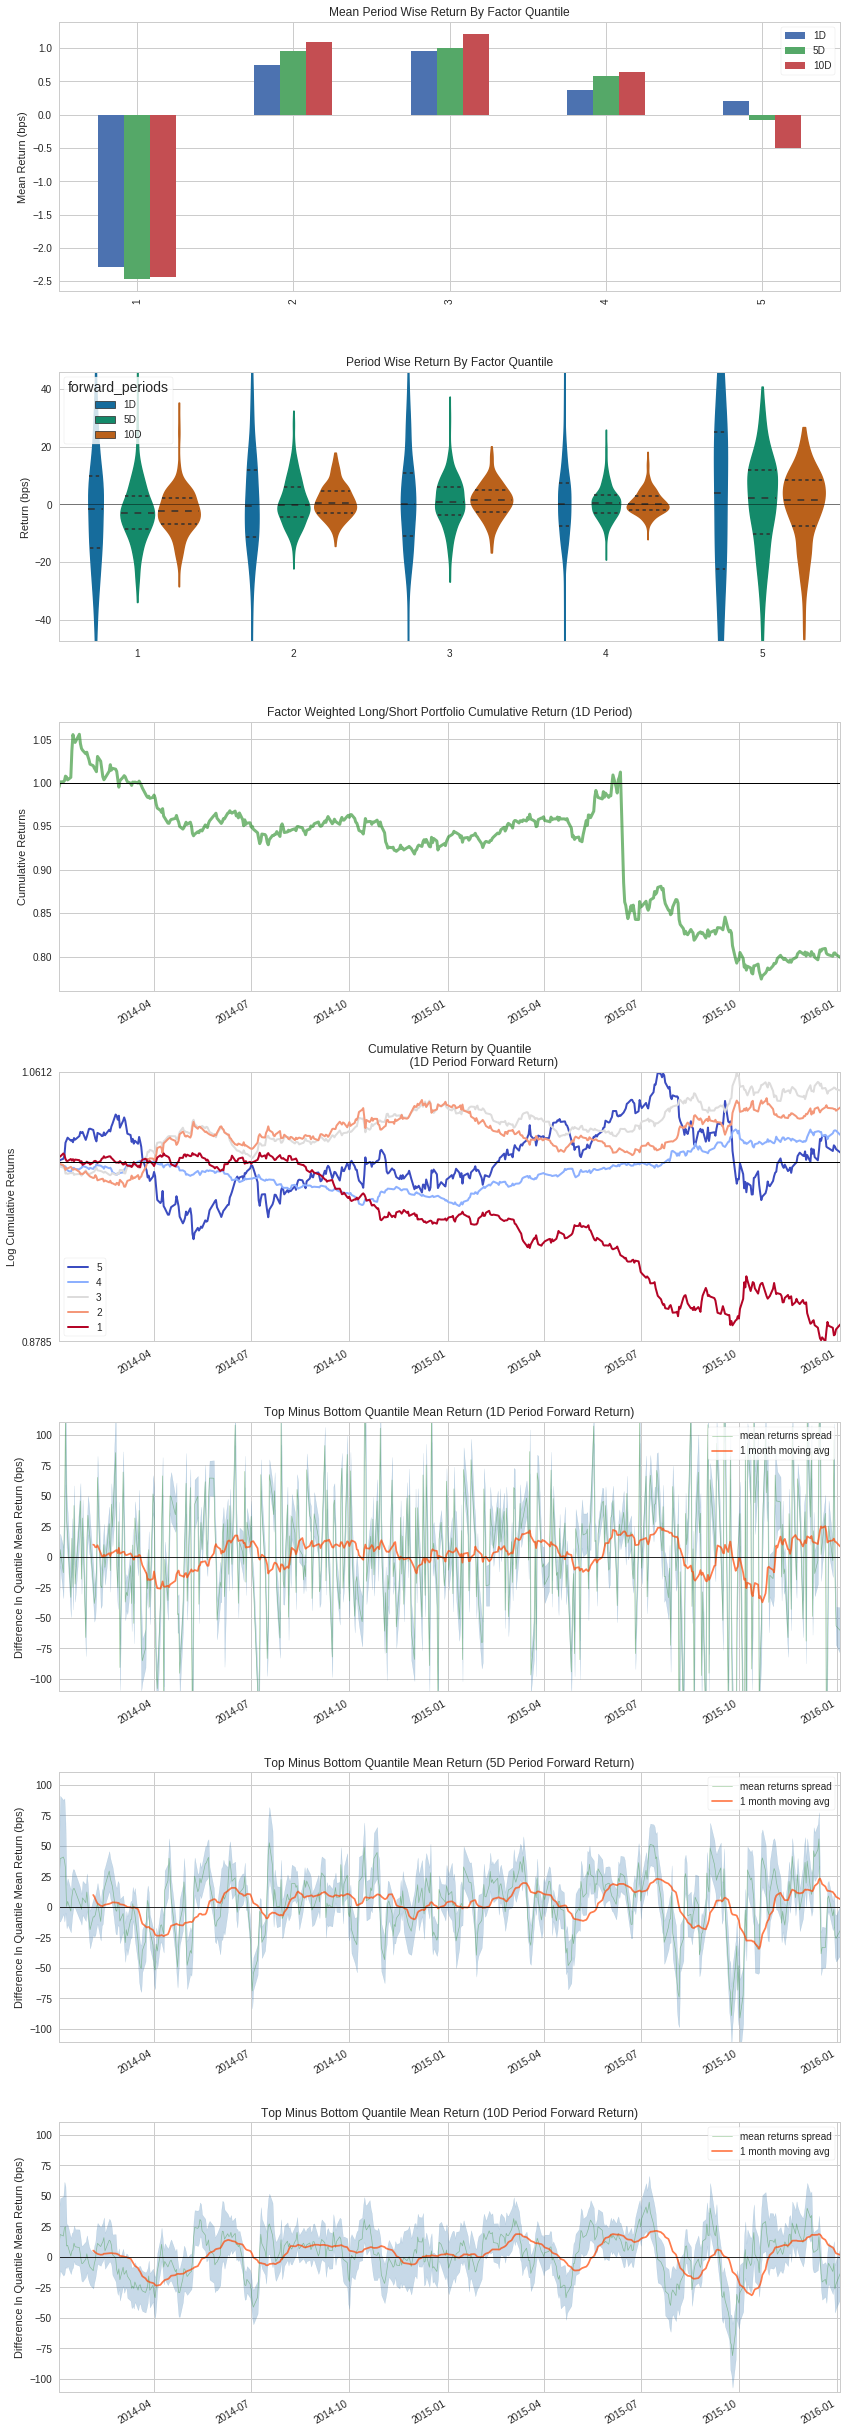

Information Analysis


,1D,5D,10D
IC Mean,0.005,0.010,0.009
IC Std.,0.084,0.083,0.086
Risk-Adjusted IC,0.056,0.118,0.108
t-stat(IC),1.256,2.659,2.433
p-value(IC),0.210,0.008,0.015
IC Skew,-0.219,-0.441,-0.469
IC Kurtosis,-0.279,-0.285,-0.007


/venvs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/venvs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


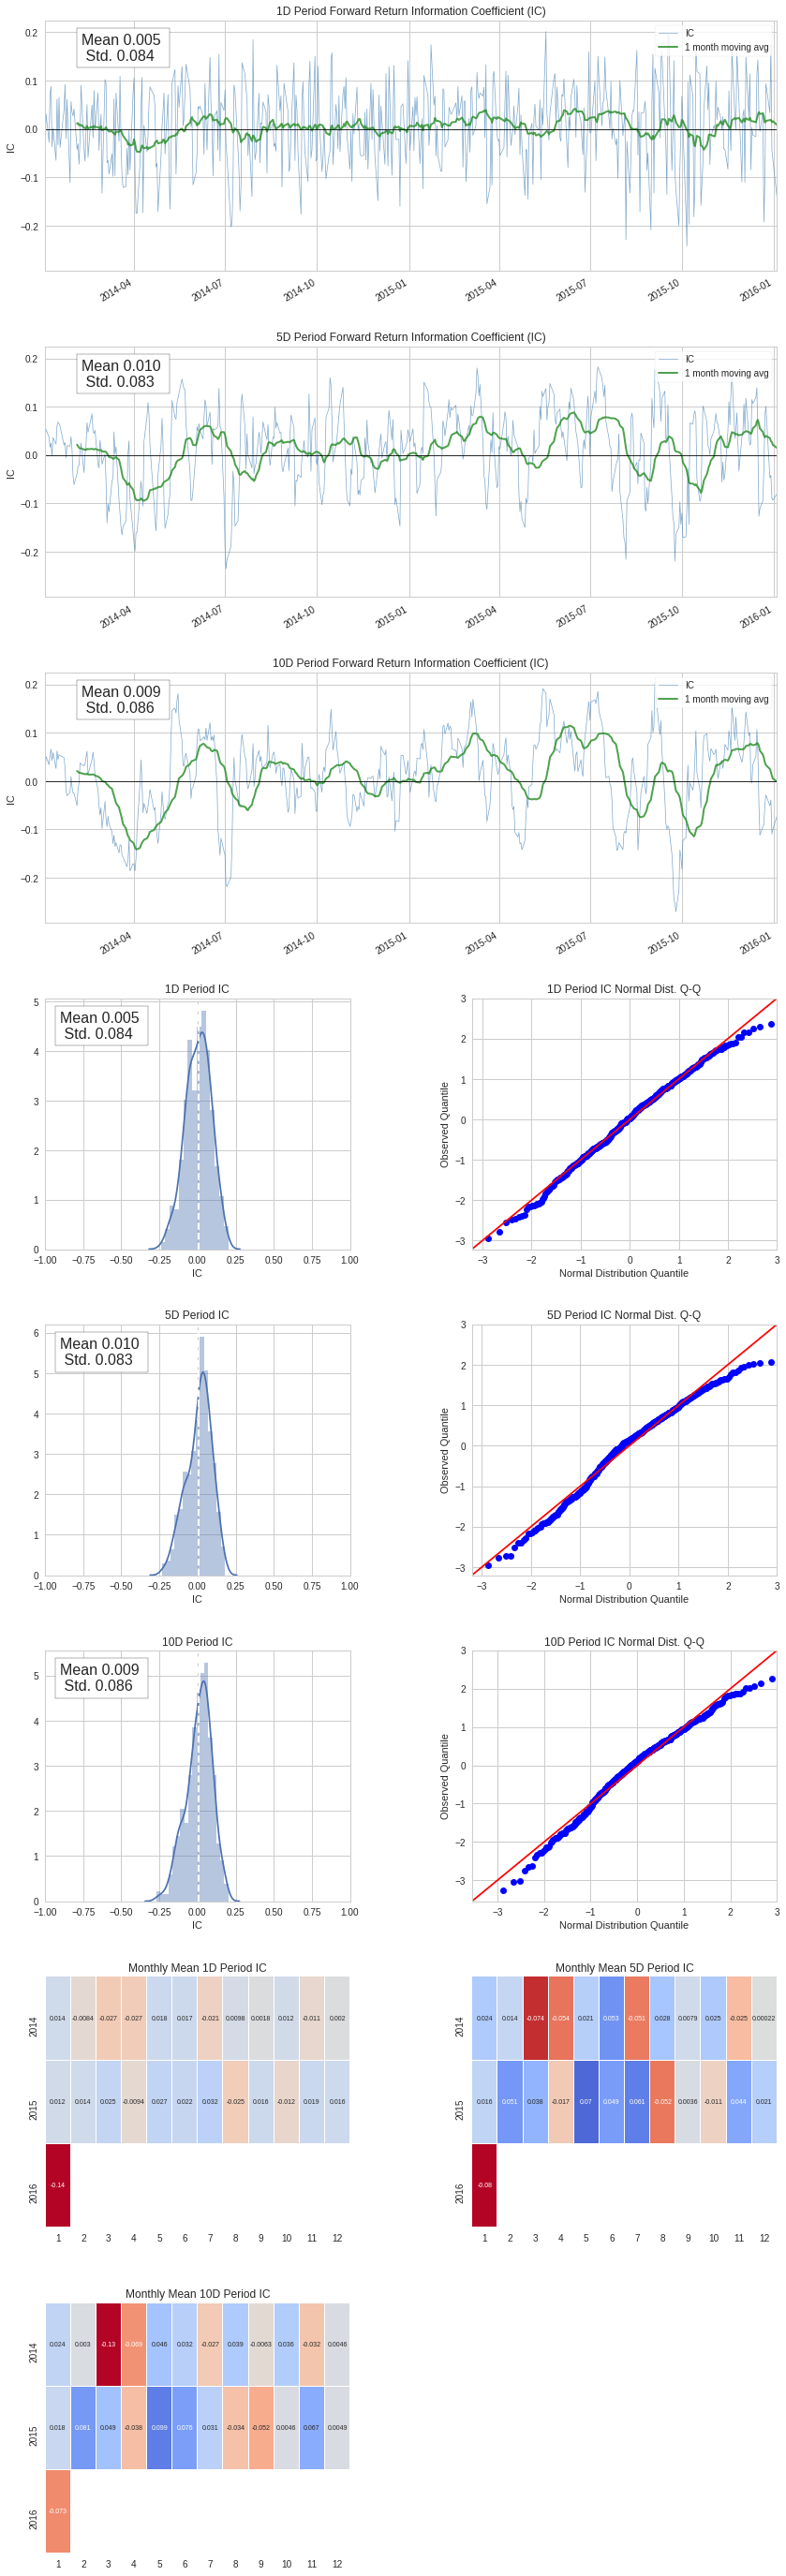

/venvs/py35/lib/python3.5/site-packages/alphalens/utils.py:912: UserWarning: Skipping return periods that aren't exact multiples of days.
  + " of days."


Turnover Analysis


,1D,5D,10D
Quantile 1 Mean Turnover,0.008,0.033,0.062
Quantile 2 Mean Turnover,0.013,0.052,0.097
Quantile 3 Mean Turnover,0.012,0.051,0.096
Quantile 4 Mean Turnover,0.010,0.042,0.079
Quantile 5 Mean Turnover,0.007,0.027,0.051


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.997,0.985,0.97


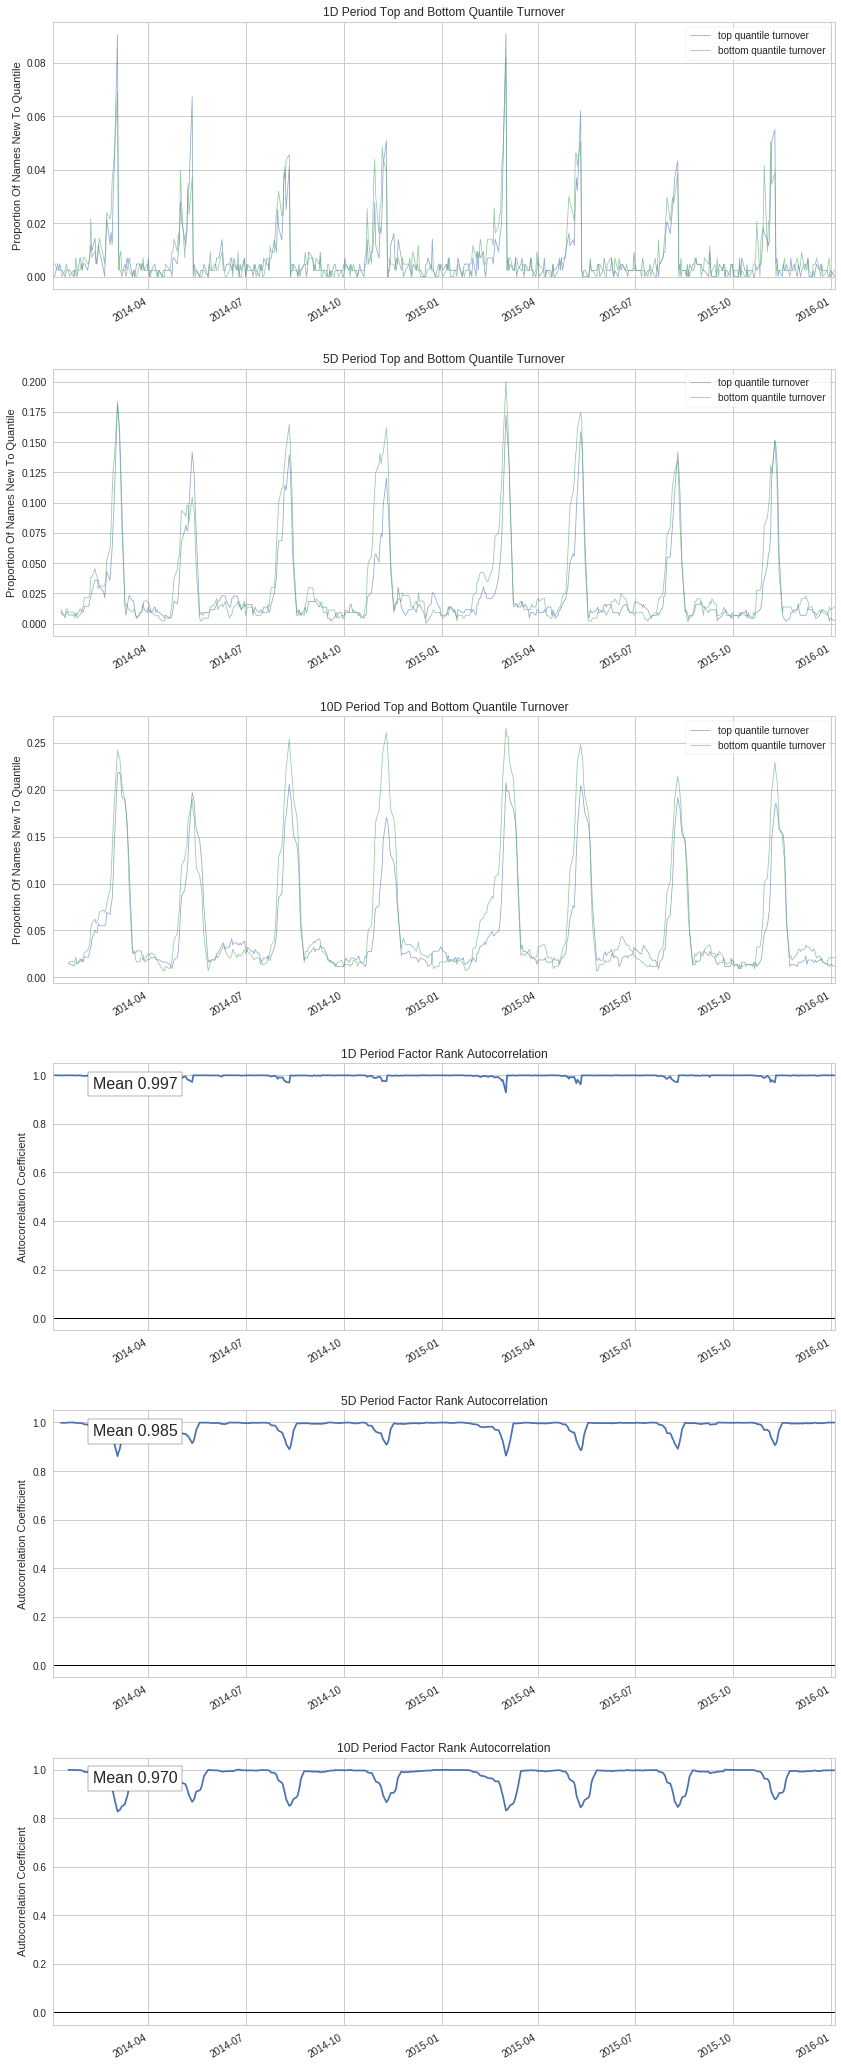

In [ ]:
from alphalens.tears import create_full_tear_sheet

create_full_tear_sheet(factor_data)